In [1]:
import argparse
import logging
import os
import os.path as osp

from mmengine.config import Config, DictAction
from mmengine.logging import print_log
from mmengine.registry import RUNNERS
from mmengine.runner import Runner

from mmdet.utils import register_all_modules
from mmengine.registry import DATASETS

register_all_modules()

In [2]:
coco_detection = 'configs/_base_/datasets/coco_detection.py'
cfg = Config.fromfile(coco_detection)

In [3]:
cfg.keys()

dict_keys(['dataset_type', 'data_root', 'file_client_args', 'train_pipeline', 'test_pipeline', 'train_dataloader', 'val_dataloader', 'test_dataloader', 'val_evaluator', 'test_evaluator'])

In [4]:
cfg.val_dataloader.dataset.pipeline.insert(1, {'type': 'LoadAnnotations', 'with_bbox': True})
train2017 = DATASETS.build(cfg.train_dataloader.dataset)
val2017 = DATASETS.build(cfg.val_dataloader.dataset)

loading annotations into memory...
Done (t=11.67s)
creating index...
index created!
loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


In [5]:
cfg.val_dataloader.dataset.pipeline

[{'type': 'LoadImageFromFile', 'file_client_args': {'backend': 'disk'}},
 {'type': 'LoadAnnotations', 'with_bbox': True},
 {'type': 'Resize', 'scale': (1333, 800), 'keep_ratio': True},
 {'type': 'LoadAnnotations', 'with_bbox': True},
 {'type': 'PackDetInputs',
  'meta_keys': ('img_id',
   'img_path',
   'ori_shape',
   'img_shape',
   'scale_factor')}]

In [6]:
import matplotlib.pyplot as plt

In [7]:
idx = 1
data = train2017[idx]
image = data['inputs'].permute([1,2,0]).numpy()

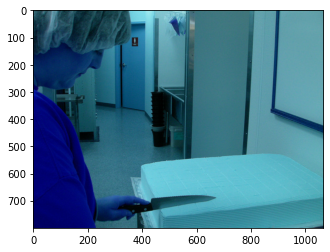

In [8]:
plt.imshow(image)

In [9]:
data.keys()

dict_keys(['inputs', 'data_samples'])

In [10]:
train2017.get_cat_ids(idx)

[0, 43, 55, 71]

In [11]:
train2017_cat2num = dict()
train2017_id2cat = train2017.metainfo['CLASSES']
for i in range(len(train2017)):
    for instrance in train2017.get_cat_ids(i):
        if train2017_cat2num.get(train2017_id2cat[instrance]) is None:
            train2017_cat2num[train2017_id2cat[instrance]] = 1
        else:
            train2017_cat2num[train2017_id2cat[instrance]] += 1

val2017_cat2num = dict()
val2017_id2cat = val2017.metainfo['CLASSES']
for i in range(len(val2017)):
    for instrance in val2017.get_cat_ids(i):
        if val2017_cat2num.get(val2017_id2cat[instrance]) is None:
            val2017_cat2num[val2017_id2cat[instrance]] = 1
        else:
            val2017_cat2num[val2017_id2cat[instrance]] += 1          

In [12]:
import numpy as np

train2017_cat_list = []
train2017_num_list = []
for cat, num in train2017_cat2num.items():
    train2017_cat_list.append(cat)
    train2017_num_list.append(num)
    
val2017_cat_list = []
val2017_num_list = []
for cat, num in val2017_cat2num.items():
    val2017_cat_list.append(cat)
    val2017_num_list.append(num)  
    
pred_0_cat_list = []
pred_0_num_list = []
for cat, num in pred_cat2num_0.items():
    pred_0_cat_list.append(cat)
    pred_0_num_list.append(num) 
    
pred_5_cat_list = []
pred_5_num_list = []
for cat, num in pred_cat2num_5.items():
    pred_5_cat_list.append(cat)
    pred_5_num_list.append(num) 
    
pred_7_cat_list = []
pred_7_num_list = []
for cat, num in pred_cat2num_7.items():
    pred_7_cat_list.append(cat)
    pred_7_num_list.append(num) 
    
pred_9_cat_list = []
pred_9_num_list = []
for cat, num in pred_cat2num_9.items():
    pred_9_cat_list.append(cat)
    pred_9_num_list.append(num) 
    
sorted_train2017_idx = sorted(range(len(train2017_num_list)), key=lambda k: train2017_num_list[k], reverse=True)
sorted_val2017_idx = sorted(range(len(val2017_num_list)), key=lambda k: val2017_num_list[k], reverse=True)


sorted_train2017_cat_list = [train2017_cat_list[idx] for idx in sorted_train2017_idx]
sorted_train2017_lognum_list = [np.log(train2017_num_list[idx]) for idx in sorted_train2017_idx]

sorted_val2017_cat_list = [val2017_cat_list[val2017_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_val2017_num_list = [val2017_num_list[val2017_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_val2017_lognum_list = [np.log(val2017_num_list[val2017_cat_list.index(cat)]) for cat in sorted_train2017_cat_list]
sorted_val2017_ratio_list = [lognum / sum(sorted_val2017_lognum_list) for lognum in sorted_val2017_lognum_list]

sorted_pred_0_cat_list = [pred_0_cat_list[pred_0_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_0_num_list = [pred_0_num_list[pred_0_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_0_lognum_list = [np.log(pred_0_num_list[pred_0_cat_list.index(cat)]) for cat in sorted_train2017_cat_list]
sorted_pred_0_ratio_list = [lognum / sum(sorted_pred_0_lognum_list) for lognum in sorted_pred_0_lognum_list]

sorted_pred_5_cat_list = [pred_5_cat_list[pred_5_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_5_num_list = [pred_5_num_list[pred_5_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_5_lognum_list = [np.log(pred_5_num_list[pred_5_cat_list.index(cat)]) for cat in sorted_train2017_cat_list]
sorted_pred_5_ratio_list = [lognum / sum(sorted_pred_5_lognum_list) for lognum in sorted_pred_5_lognum_list]

sorted_pred_7_cat_list = [pred_7_cat_list[pred_7_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_7_num_list = [pred_7_num_list[pred_7_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_7_lognum_list = [np.log(pred_7_num_list[pred_7_cat_list.index(cat)]) for cat in sorted_train2017_cat_list]
sorted_pred_7_ratio_list = [lognum / sum(sorted_pred_7_lognum_list) for lognum in sorted_pred_7_lognum_list]

sorted_pred_9_cat_list = [pred_9_cat_list[pred_9_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_9_num_list = [pred_9_num_list[pred_9_cat_list.index(cat)] for cat in sorted_train2017_cat_list]
sorted_pred_9_lognum_list = [np.log(pred_9_num_list[pred_9_cat_list.index(cat)]) for cat in sorted_train2017_cat_list]
sorted_pred_9_ratio_list = [lognum / sum(sorted_pred_9_lognum_list) for lognum in sorted_pred_9_lognum_list]

NameError: name 'pred_cat2num_0' is not defined

In [13]:
plt.figure(figsize=(16, 4))
# plt.plot(sorted_train2017_cat_list, sorted_train2017_lognum_list, "g", marker='D', markersize=5, label='train2017')
plt.plot(sorted_train2017_cat_list, c_sorted_val2017_ratio_list, "r", marker='D', markersize=3, label='val2017')
plt.plot(sorted_train2017_cat_list, c_sorted_pred_0_ratio_list, "b", marker='>', markersize=3, label='pred_0')
# plt.plot(sorted_train2017_cat_list, c_sorted_pred_5_ratio_list, "y", marker='>', markersize=3, label='pred_5')
# plt.plot(sorted_train2017_cat_list, c_sorted_pred_7_ratio_list, "m", marker='v', markersize=3, label='pred_7')
plt.plot(sorted_train2017_cat_list, c_sorted_pred_9_ratio_list, "k", marker='<', markersize=3, label='pred_9')


plt.xlabel("category")
plt.ylabel("lognum")
plt.title("coco2017_cat2lognum")
plt.xticks(rotation=270)

plt.legend(loc="upper right")
# plt.savefig("1.jpg")
plt.show()

NameError: name 'sorted_train2017_cat_list' is not defined

<Figure size 1152x288 with 0 Axes>

In [14]:
sorted_train2017_idx = sorted(range(len(train2017_num_list)), key=lambda k: train2017_num_list[k], reverse=True)
sorted_val2017_idx = sorted(range(len(val2017_num_list)), key=lambda k: val2017_num_list[k], reverse=True)
sorted_pred_0_idx = sorted(range(len(pred_0_num_list)), key=lambda k: pred_0_num_list[k], reverse=True)
sorted_pred_5_idx = sorted(range(len(pred_5_num_list)), key=lambda k: pred_5_num_list[k], reverse=True)
sorted_pred_7_idx = sorted(range(len(pred_7_num_list)), key=lambda k: pred_7_num_list[k], reverse=True)
sorted_pred_9_idx = sorted(range(len(pred_9_num_list)), key=lambda k: pred_9_num_list[k], reverse=True)

sorted_pred_logthr_9_idx = sorted(range(len(pred_logthr_9_num_list)), key=lambda k: pred_logthr_9_num_list[k], reverse=True)
sorted_pred_areathr_9_idx = sorted(range(len(pred_areathr_9_num_list)), key=lambda k: pred_areathr_9_num_list[k], reverse=True)
sorted_pred_arealogthr_9_idx = sorted(range(len(pred_arealogthr_9_num_list)), key=lambda k: pred_arealogthr_9_num_list[k], reverse=True)

sorted_train2017_lognum_list = [np.log(train2017_num_list[idx]) for idx in sorted_train2017_idx]
sorted_val2017_lognum_list = [np.log(val2017_num_list[idx]) for idx in sorted_val2017_idx]
sorted_pred_0_lognum_list = [np.log(pred_0_num_list[idx]) for idx in sorted_pred_0_idx]
sorted_pred_5_lognum_list = [np.log(pred_5_num_list[idx]) for idx in sorted_pred_5_idx]
sorted_pred_7_lognum_list = [np.log(pred_7_num_list[idx]) for idx in sorted_pred_7_idx]
sorted_pred_9_lognum_list = [np.log(pred_9_num_list[idx]) for idx in sorted_pred_9_idx]

sorted_pred_logthr_9_lognum_list = [np.log(pred_logthr_9_num_list[idx]) for idx in sorted_pred_logthr_9_idx]
sorted_pred_areathr_9_lognum_list = [np.log(pred_areathr_9_num_list[idx]) for idx in sorted_pred_areathr_9_idx]
sorted_pred_arealogthr_9_lognum_list = [np.log(pred_arealogthr_9_num_list[idx]) for idx in sorted_pred_arealogthr_9_idx]

sorted_train2017_ratio_list = [lognum / sum(sorted_train2017_lognum_list) for lognum in sorted_train2017_lognum_list]
sorted_val2017_ratio_list = [lognum / sum(sorted_val2017_lognum_list) for lognum in sorted_val2017_lognum_list]
sorted_pred_0_ratio_list = [lognum / sum(sorted_pred_0_lognum_list) for lognum in sorted_pred_0_lognum_list]
sorted_pred_5_ratio_list = [lognum / sum(sorted_pred_5_lognum_list) for lognum in sorted_pred_5_lognum_list]
sorted_pred_7_ratio_list = [lognum / sum(sorted_pred_7_lognum_list) for lognum in sorted_pred_7_lognum_list]
sorted_pred_9_ratio_list = [lognum / sum(sorted_pred_9_lognum_list) for lognum in sorted_pred_9_lognum_list]

sorted_pred_logthr_9_ratio_list = [lognum / sum(sorted_pred_logthr_9_lognum_list) for lognum in sorted_pred_logthr_9_lognum_list]
sorted_pred_areathr_9_ratio_list = [lognum / sum(sorted_pred_areathr_9_lognum_list) for lognum in sorted_pred_areathr_9_lognum_list]
sorted_pred_arealogthr_9_ratio_list = [lognum / sum(sorted_pred_arealogthr_9_lognum_list) for lognum in sorted_pred_arealogthr_9_lognum_list]

kernel_size = 7
weight = np.ones(kernel_size)
weight = weight / kernel_size
c_sorted_train2017_ratio_list = np.convolve(np.array(sorted_train2017_ratio_list),weight)[kernel_size-1:]
c_sorted_val2017_ratio_list = np.convolve(np.array(sorted_val2017_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_0_ratio_list = np.convolve(np.array(sorted_pred_0_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_5_ratio_list = np.convolve(np.array(sorted_pred_5_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_7_ratio_list = np.convolve(np.array(sorted_pred_7_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_9_ratio_list = np.convolve(np.array(sorted_pred_9_ratio_list),weight)[kernel_size-1:]

c_sorted_pred_logthr_9_ratio_list = np.convolve(np.array(sorted_pred_logthr_9_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_areathr_9_ratio_list = np.convolve(np.array(sorted_pred_areathr_9_ratio_list),weight)[kernel_size-1:]
c_sorted_pred_arealogthr_9_ratio_list = np.convolve(np.array(sorted_pred_arealogthr_9_ratio_list),weight)[kernel_size-1:]

x = list(range(len(sorted_pred_0_num_list)))
plt.figure(figsize=(16, 4))
# 

# val2017 longer-tail than train2017
plt.plot(x, c_sorted_pred_0_ratio_list, "b", marker='>', markersize=3, label='pred_0')
# plt.plot(x, c_sorted_pred_5_ratio_list, "g", marker='>', markersize=3, label='pred_5')
# plt.plot(x, c_sorted_pred_7_ratio_list, "y", marker='v', markersize=3, label='pred_7')
plt.plot(x, c_sorted_pred_9_ratio_list, "k", marker='<', markersize=3, label='pred_9')

plt.plot(x, c_sorted_val2017_ratio_list, "y", marker='D', markersize=3, label='val2017')
plt.plot(x, c_sorted_train2017_ratio_list, "r", marker='D', markersize=3, label='train2017')

# plt.plot(x, c_sorted_pred_logthr_9_ratio_list, "b", marker='<', markersize=3, label='pred_logthr_9')
# plt.plot(x, c_sorted_pred_areathr_9_ratio_list, "m", marker='<', markersize=3, label='pred_areathr_9')
# plt.plot(x, c_sorted_pred_arealogthr_9_ratio_list, "y", marker='<', markersize=3, label='pred_arealogthr_9')

plt.xlabel("category")
plt.ylabel("lognum")
plt.title("coco100%_cat2lognumratio_smoothed")
plt.xticks(rotation=270)

plt.legend(loc="upper right")
# plt.savefig("1.jpg")
plt.show()


NameError: name 'pred_5_num_list' is not defined

In [15]:
sum(pred_arealogthr_9_num_list)

NameError: name 'pred_arealogthr_9_num_list' is not defined

In [16]:
sum(pred_areathr_9_num_list)

NameError: name 'pred_areathr_9_num_list' is not defined

In [17]:
sum(pred_logthr_9_num_list)

NameError: name 'pred_logthr_9_num_list' is not defined

In [18]:
sum(pred_9_num_list)

NameError: name 'pred_9_num_list' is not defined

In [19]:
from scipy.interpolate import make_interp_spline

x_smooth = list(range(len(sorted_pred_0_num_list)))
s_sorted_pred_0_lognum_list = list(make_interp_spline(x_smooth, sorted_pred_0_lognum_list)(x_smooth))
s_sorted_pred_5_lognum_list = list(make_interp_spline(x_smooth, sorted_pred_5_lognum_list)(x_smooth))
s_sorted_pred_7_lognum_list = list(make_interp_spline(x_smooth, sorted_pred_7_lognum_list)(x_smooth))
s_sorted_pred_9_lognum_list = list(make_interp_spline(x_smooth, sorted_pred_9_lognum_list)(x_smooth))


NameError: name 'sorted_pred_0_num_list' is not defined

In [20]:
c_sorted_pred_0_lognum_list

NameError: name 'c_sorted_pred_0_lognum_list' is not defined

In [21]:
len(sorted_pred_0_lognum_list)

NameError: name 'sorted_pred_0_lognum_list' is not defined

In [22]:
from mmdet.apis import init_detector, inference_detector
import mmcv

# 指定模型的配置文件和 checkpoint 文件路径
config_file = 'configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '../faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 根据配置文件和 checkpoint 文件构建模型
model = init_detector(config_file, checkpoint_file, device='cuda:0')

FileNotFoundError: file "/home/SENSETIME/chenzeming.vendor/Documents/OpenMMLab/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py" does not exist

In [23]:
data = train2017[0]
img = data['inputs'].permute([1,2,0]).numpy()

In [24]:
results = inference_detector(model, data['inputs'].permute([1,2,0]).numpy())

NameError: name 'model' is not defined

In [25]:
results

NameError: name 'results' is not defined

In [26]:

results.gt_instances = results.pred_instances[results.pred_instances.scores > 0.7]

NameError: name 'results' is not defined

In [27]:
from mmdet.visualization import DetLocalVisualizer

visualizer = DetLocalVisualizer()
visualizer.dataset_meta = val2017.metainfo

visualizer.add_datasample('image', img, results)

/home/SENSETIME/chenzeming.vendor/Documents/OpenMMLab/mmengine/mmengine/visualization/visualizer.py:170: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


NameError: name 'results' is not defined

In [28]:
results_list = []
for i in range(len(val2017)):
    data = val2017[i]
    results_list.append(inference_detector(model, data['inputs'].permute([1,2,0]).numpy()))
    print('\r{}/{}'.format(i,len(val2017)), end='')
    

NameError: name 'model' is not defined

In [29]:
results_list[0]


IndexError: list index out of range

In [30]:
pred_cat2num_0 = dict()
pred_cat2num_5 = dict()
pred_cat2num_7 = dict()
pred_cat2num_9 = dict()

for k in val2017_cat2num.keys():
    pred_cat2num_0[k] = 1
    pred_cat2num_5[k] = 1
    pred_cat2num_7[k] = 1
    pred_cat2num_9[k] = 1

for results in results_list:
    for label in results.pred_instances.labels:
        pred_cat2num_0[val2017_id2cat[int(label.cpu())]] += 1

for results in results_list:
    labels = results.pred_instances.labels[results.pred_instances.scores > 0.5]
    for label in labels:
        pred_cat2num_5[val2017_id2cat[int(label.cpu())]] += 1

for results in results_list:
    labels = results.pred_instances.labels[results.pred_instances.scores > 0.7]
    for label in labels:
        pred_cat2num_7[val2017_id2cat[int(label.cpu())]] += 1
            
for results in results_list:
    labels = results.pred_instances.labels[results.pred_instances.scores > 0.9]
    for label in labels:
        pred_cat2num_9[val2017_id2cat[int(label.cpu())]] += 1

In [31]:
pred_cat2score = dict()

for k in val2017_cat2num.keys():
    pred_cat2score[k] = []

for results in results_list:
    labels = results.pred_instances.labels
    scores = results.pred_instances.scores
    for i in range(len(labels)):
        pred_cat2score[val2017_id2cat[int(labels[i].cpu())]].append(float(scores[i].cpu()))

In [32]:
pred_cat2scoremean = dict()
pred_cat2scoremax = dict()
pred_cat2scoremin = dict()

for k,v in pred_cat2score.items():
    score = np.array(v)
    mean = score.mean()
    std = score.std()
    pred_cat2scoremean[k] = mean
    pred_cat2scoremax[k] = mean + std
    pred_cat2scoremin[k] = mean - std

/tmp/ipykernel_6761/1129477793.py:7: RuntimeWarning: Mean of empty slice.
  mean = score.mean()
/home/SENSETIME/chenzeming.vendor/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/SENSETIME/chenzeming.vendor/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/SENSETIME/chenzeming.vendor/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/SENSETIME/chenzeming.vendor/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [33]:
pred_cat2scoremean_list = [pred_cat2scoremean[cat] for cat in sorted_train2017_cat_list] 
pred_cat2scoremax_list = [pred_cat2scoremax[cat] for cat in sorted_train2017_cat_list] 
pred_cat2scoremin_list = [pred_cat2scoremin[cat] for cat in sorted_train2017_cat_list] 

NameError: name 'sorted_train2017_cat_list' is not defined

In [34]:
plt.figure(figsize=(16, 4))
plt.plot(sorted_train2017_cat_list, pred_cat2scoremean_list, "r", marker='D', markersize=3, label='mean')
plt.plot(sorted_train2017_cat_list, pred_cat2scoremax_list, "b", marker='>', markersize=3, label='max')
plt.plot(sorted_train2017_cat_list, pred_cat2scoremin_list, "y", marker='>', markersize=3, label='min')


plt.xlabel("category")
plt.ylabel("lognum")
plt.title("coco2017_cat2score")
plt.xticks(rotation=270)

plt.legend(loc="upper right")
# plt.savefig("1.jpg")
plt.show()

NameError: name 'sorted_train2017_cat_list' is not defined

<Figure size 1152x288 with 0 Axes>

In [35]:
num_9_ratio = [num/sum(sorted_pred_9_num_list) for num in sorted_pred_9_num_list]
lognum_9_ratio = [lognum/sum(sorted_pred_9_lognum_list)+1e-3 for lognum in sorted_pred_9_lognum_list]

thr_9 = [0.9 * ratio / max(num_9_ratio) for ratio in num_9_ratio]
logthr_9 = [0.9 * ratio / max(lognum_9_ratio) for ratio in lognum_9_ratio]

NameError: name 'sorted_pred_9_num_list' is not defined

In [36]:
pred_cat2num_logthr_9 = dict()
for k in val2017_cat2num.keys():
    pred_cat2num_logthr_9[k] = 1
    
for results in results_list:
    labels = results.pred_instances.labels
    scores = results.pred_instances.scores
    for i in range(len(labels)):
        if scores[i] > logthr_9[sorted_train2017_cat_list.index(train2017_id2cat[int(labels[i].cpu())])]:
            pred_cat2num_logthr_9[val2017_id2cat[int(labels[i].cpu())]] += 1

In [37]:
pred_logthr_9_cat_list = []
pred_logthr_9_num_list = []
for cat, num in pred_cat2num_logthr_9.items():
    pred_logthr_9_cat_list.append(cat)
    pred_logthr_9_num_list.append(num) 

In [38]:
pred_cat2num_arealogthr_9 = dict()
for k in val2017_cat2num.keys():
    pred_cat2num_arealogthr_9[k] = 1
    
for i in range(len(val2017)):
    labels = results_list[i].pred_instances.labels.cpu().numpy()
    scores = results_list[i].pred_instances.scores.cpu().numpy()
    bboxes = results_list[i].pred_instances.bboxes.cpu().numpy()
    img_shape = val2017[i]['data_sample'].img_shape
    bbox_areas = (bboxes[:, 2] - bboxes[:, 0]) * (bboxes[:, 3] - bboxes[:, 1])
    img_area = img_shape[0] * img_shape[1]
    areas = bbox_areas / img_area
    for i in range(len(labels)):
        if scores[i] > logthr_9[sorted_train2017_cat_list.index(train2017_id2cat[int(labels[i])])] * np.sin(areas[i] + np.pi/2 - 1):
            pred_cat2num_arealogthr_9[val2017_id2cat[int(labels[i])]] += 1

IndexError: list index out of range

In [39]:
pred_arealogthr_9_cat_list = []
pred_arealogthr_9_num_list = []
for cat, num in pred_cat2num_arealogthr_9.items():
    pred_arealogthr_9_cat_list.append(cat)
    pred_arealogthr_9_num_list.append(num) 

In [40]:
val2017[0]['data_sample']

KeyError: 'data_sample'

In [41]:
val2017[1]['data_sample']

KeyError: 'data_sample'

In [42]:
max(area_ratios)

NameError: name 'area_ratios' is not defined

In [43]:
pred_cat2num_areathr_9 = dict()
areathr_9 = 0.9 * area_ratios
area_ratios_list = []
labels_list = []
scores_list = []

for i in range(len(val2017)):
    data_sample = val2017[i]['data_sample']
    results = results_list[i]  
    bboxes = results.pred_instances.bboxes.cpu().numpy()
    labels = results.pred_instances.labels.cpu().numpy()
    scores = results.pred_instances.scores.cpu().numpy()
    bbox_areas = (bboxes[:, 2] - bboxes[:, 0]) * (bboxes[:, 3] - bboxes[:, 1])
    img_area = data_sample.img_shape[0] * data_sample.img_shape[1]
    area_ratios = bbox_areas / img_area
    area_ratios_list.append(area_ratios)
    labels_list.append(labels)
    scores_list.append(scores)

NameError: name 'area_ratios' is not defined

In [44]:
area_array = np.concatenate(area_ratios_list)
label_array = np.concatenate(labels_list)
score_array = np.concatenate(scores_list)

idx = np.argsort(area_array)

area_array = area_array[idx]
label_array = label_array[idx]
score_array = score_array[idx]

NameError: name 'area_ratios_list' is not defined

In [45]:
area_array.shape

NameError: name 'area_array' is not defined

In [46]:
score_array.shape

NameError: name 'score_array' is not defined

In [47]:
area_array.max()

NameError: name 'area_array' is not defined

In [48]:
area_array.min()

NameError: name 'area_array' is not defined

In [49]:
plt.figure(figsize=(20,10))
fre_tuple = plt.hist(area_array, bins=100, color='steelblue')
plt.title('area_ratio')
plt.show()


NameError: name 'area_array' is not defined

<Figure size 1440x720 with 0 Axes>

In [50]:
plt.plot(fre_tuple[1][:-1], np.log(fre_tuple[0]), "r", marker='D', markersize=3, label='mean')

NameError: name 'fre_tuple' is not defined

In [51]:
plt.scatter(area_array, score_array, s=0.1)
plt.xlabel("bbox_area_ratio")
plt.ylabel("score")
plt.title("coco2017_area2score_0")

NameError: name 'area_array' is not defined

In [52]:
bin_num = 20
max_area = 1
score_mean = []
score_min =[]
score_max = []

for j in range(bin_num):
    area_inds = ((j/bin_num*max_area) < area_array ) & (area_array < ((j+1)/bin_num*max_area))
    area_scores = score_array[area_inds]
    area_scores_mean = area_scores.mean()
    area_scores_std = area_scores.std()
    score_mean.append(area_scores_mean)
    score_max.append(area_scores_mean+area_scores_std)
    score_min.append(area_scores_mean-area_scores_std)

kernel_size = 5
weight = np.ones(kernel_size)
weight = weight / kernel_size

c_score_mean = np.convolve(np.array(score_mean),weight)[:-kernel_size+1]
c_score_max = np.convolve(np.array(score_max),weight)[:-kernel_size+1]
c_score_min = np.convolve(np.array(score_min),weight)[:-kernel_size+1]

NameError: name 'area_array' is not defined

In [53]:
x = [b/bin_num*max_area for b in range(bin_num)]
smin = score_array.mean()
smax = 0.9
x = np.array([b/bin_num*max_area for b in range(bin_num)])
sy = (smax - smin)*x + smin
sy = 0.9 * np.sin(x+np.pi/2-1)

# plt.plot(x, x, "r", marker='D', markersize=3, label='linear')
# plt.plot(x, sy, "r", marker='D', markersize=3, label='linear_y')
plt.plot(x, sy, "r", marker='D', markersize=3, label='sqrt_y')

plt.plot(x, score_mean, "r", marker='D', markersize=3, label='mean')
plt.plot(x, score_max, "b", marker='>', markersize=3, label='mean+std')
plt.plot(x, score_min, "y", marker='>', markersize=3, label='mean-std')


plt.xlabel("area")
plt.ylabel("score")
plt.title("coco2017_area2score")


plt.legend(loc="upper right")
# plt.savefig("1.jpg")
plt.show()

NameError: name 'score_array' is not defined

In [54]:
areaRng = [[0 ** 2, 1e5 ** 2], [0 ** 2, 32 ** 2], [32 ** 2, 96 ** 2], [96 ** 2, 1e5 ** 2]]

In [55]:
areaRng

[[0, 10000000000.0], [0, 1024], [1024, 9216], [9216, 10000000000.0]]

In [56]:
area_array.shape

NameError: name 'area_array' is not defined

In [57]:
area_array

NameError: name 'area_array' is not defined

In [58]:
smin = score_array.mean()
smax = 0.9
x = np.array([b/bin_num*max_area for b in range(bin_num)])
# areathr = (smax - smin)*area_array + smin
# areathr = np.sqrt((smax - smin)*area_array + smin)

areathr = 0.9 * np.sin(area_array + np.pi/2 - 1)

NameError: name 'score_array' is not defined

In [59]:
sum(score_array > areathr)

NameError: name 'score_array' is not defined

In [60]:
label_array[score_array > areathr]

NameError: name 'label_array' is not defined

In [61]:

pred_cat2num_areathr_9 = dict()

for k in val2017_cat2num.keys():
    pred_cat2num_areathr_9[k] = 1

for label in label_array[score_array > areathr]:
    pred_cat2num_areathr_9[val2017_id2cat[int(label)]] += 1

pred_areathr_9_cat_list = []
pred_areathr_9_num_list = []
for cat, num in pred_cat2num_areathr_9.items():
    pred_areathr_9_cat_list.append(cat)
    pred_areathr_9_num_list.append(num)

NameError: name 'label_array' is not defined

In [62]:
train2017[0]

{'inputs': tensor([[[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [ 16,  19,  27,  ..., 106, 125, 134],
          [ 21,  23,  26,  ..., 120, 125, 128],
          [ 24,  25,  26,  ..., 127, 126, 125]],
 
         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [ 94,  91,  85,  ..., 139, 155, 162],
          [ 84,  82,  78,  ..., 163, 160, 158],
          [ 79,  77,  74,  ..., 174, 162, 157]],
 
         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [ 64,  65,  66,  ..., 170, 186, 193],
          [ 61,  61,  60,  ..., 186, 183, 181],
          [ 60,  59,  56,  ..., 193, 181, 176]]], dtype=torch.uint8),
 'data_samples': <DetDataSample(
 
     META INFORMAT

In [63]:
i = 0
pred_labels = results_list[i].pred_instances.labels.cpu().numpy()
pred_scores = results_list[i].pred_instances.scores.cpu().numpy()
pred_bboxes = results_list[i].pred_instances.bboxes.cpu().numpy()
data_sample = val2017[i]['data_sample']
gt_labels = data_sample.gt_instances.labels.numpy()
gt_bboxes = data_sample.gt_instances.bboxes.numpy()
for cat in range(len(val2017_id2cat)):
    pred_bboxes[pred_labels == cat] += bias * cat
    gt_bboxes[gt_labels == cat] += bias * cat
left_top = np.maximum(pred_bboxes[:, None, :2], gt_bboxes[:, :2])
right_bottom = np.minimum(pred_bboxes[:, None, 2:], gt_bboxes[:, 2:])
wh = np.maximum(right_bottom - left_top, 0)
inter_areas = wh[:, :, 0] * wh[:, :, 1]
pred_areas = (pred_bboxes[:, 2] - pred_bboxes[:, 0]) * (pred_bboxes[:, 3] - pred_bboxes[:, 1])
gt_areas = (gt_bboxes[:, 2] - gt_bboxes[:, 0]) * (gt_bboxes[:, 3] - gt_bboxes[:, 1])
ious = inter_areas / (pred_areas[:, np.newaxis] + gt_areas[np.newaxis, :] - inter_areas + 1e-7)

IndexError: list index out of range

In [64]:
np.max(ious, axis=-1)

NameError: name 'ious' is not defined

In [65]:
pred_areas.shape

NameError: name 'pred_areas' is not defined

In [66]:
gt_areas.shape

NameError: name 'gt_areas' is not defined

In [67]:
a = pred_areas[:, np.newaxis] + gt_areas[np.newaxis, :]

NameError: name 'pred_areas' is not defined

In [68]:
a.shape

NameError: name 'a' is not defined

In [69]:
pred_areas + np.transpose(gt_areas)

NameError: name 'pred_areas' is not defined

In [70]:
pred_areas

NameError: name 'pred_areas' is not defined

In [71]:

gt_areas

NameError: name 'gt_areas' is not defined

In [72]:
inter_areas / (pred_areas[:, np.newaxis] + gt_areas[np.newaxis, :] - inter_areas + 1e-7)

NameError: name 'inter_areas' is not defined

In [73]:
inter_areas_mix, _ = inter_areas.max(dim=-1)

NameError: name 'inter_areas' is not defined

In [74]:
inter_areas_mix.shape

NameError: name 'inter_areas_mix' is not defined

In [75]:
import copy

val2017_score_list = []
val2017_iou_list = []
val2017_logthr_9_score_list = []
val2017_areathr_9_score_list = []
val2017_arealogthr_9_score_list = []
val2017_label_list = []

bias = 2000
for i in range(len(val2017)):
    if len(results_list[i].pred_instances) == 0:
        continue
    if len(val2017[i]['data_sample'].gt_instances) == 0:
        continue
    pred_labels = results_list[i].pred_instances.labels.cpu().numpy()
    pred_scores = results_list[i].pred_instances.scores.cpu().numpy()
    pred_bboxes = results_list[i].pred_instances.bboxes.cpu().numpy()
    data_sample = val2017[i]['data_sample']
    gt_labels = data_sample.gt_instances.labels.numpy()
    gt_bboxes = data_sample.gt_instances.bboxes.numpy()
    
    pred_areas = (pred_bboxes[:, 2] - pred_bboxes[:, 0]) * (pred_bboxes[:, 3] - pred_bboxes[:, 1])
    gt_areas = (gt_bboxes[:, 2] - gt_bboxes[:, 0]) * (gt_bboxes[:, 3] - gt_bboxes[:, 1])
    img_area = data_sample.img_shape[0] * data_sample.img_shape[1]
    
    logthr_9_scores = copy.deepcopy(pred_scores)
    areathr_9_scores = copy.deepcopy(pred_scores)
    
    
    areathr_9_scores /= np.sin(pred_areas/img_area + np.pi/2 - 1)
    arealogthr_9_scores = copy.deepcopy(areathr_9_scores)
    
    for cat in range(len(val2017_id2cat)):
        pred_bboxes[pred_labels == cat] += bias * cat
        gt_bboxes[gt_labels == cat] += bias * cat
        logthr_9_scores[pred_labels == cat] /= (logthr_9[sorted_train2017_cat_list.index(train2017_id2cat[cat])] / 0.9)
        arealogthr_9_scores[pred_labels == cat] /= (logthr_9[sorted_train2017_cat_list.index(train2017_id2cat[cat])] / 0.9)
        
        
    left_top = np.maximum(pred_bboxes[:, None, :2], gt_bboxes[:, :2])
    right_bottom = np.minimum(pred_bboxes[:, None, 2:], gt_bboxes[:, 2:])
    wh = np.maximum(right_bottom - left_top, 0)
    inter_areas = wh[:, :, 0] * wh[:, :, 1]
    ious = inter_areas / (pred_areas[:, np.newaxis] + gt_areas[np.newaxis, :] - inter_areas + 1e-7)
    iou = np.max(ious, axis=-1)
    val2017_score_list.append(pred_scores)
    val2017_iou_list.append(iou)
    val2017_label_list.append(pred_labels)
    
    val2017_logthr_9_score_list.append(logthr_9_scores)
    val2017_areathr_9_score_list.append(areathr_9_scores)
    val2017_arealogthr_9_score_list.append(arealogthr_9_scores)

val2017_scores = np.concatenate(val2017_score_list)
val2017_ious = np.concatenate(val2017_iou_list)
val2017_labels = np.concatenate(val2017_label_list)

val2017_logthr_9_scores = np.concatenate(val2017_logthr_9_score_list)
val2017_areathr_9_scores = np.concatenate(val2017_areathr_9_score_list)
val2017_arealogthr_9_scores = np.concatenate(val2017_arealogthr_9_score_list)

IndexError: list index out of range

In [76]:
thr = 0.9
print(thr)
print(len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))
thr = 0.7
print(thr)
print(len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))
thr = 0.5
print(thr)
print(len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))
thr = 0.3
print(thr)
print(len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))

0.9


NameError: name 'val2017_labels' is not defined

In [77]:
thr = 0.9
print(thr)

print(len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_scores > thr)]))
print(len(val2017_labels[(val2017_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))

thr = 0.9
print(thr)
print(len(val2017_labels[(val2017_logthr_9_scores > thr)]))
print(len(val2017_labels[(val2017_logthr_9_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_logthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_logthr_9_scores > thr)]))
print(len(val2017_labels[(val2017_logthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))

print(len(val2017_labels[(val2017_areathr_9_scores > thr)]))
print(len(val2017_labels[(val2017_areathr_9_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_areathr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_areathr_9_scores > thr)]))
print(len(val2017_labels[(val2017_areathr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))

print(len(val2017_labels[(val2017_arealogthr_9_scores > thr)]))
print(len(val2017_labels[(val2017_arealogthr_9_scores > thr) & (val2017_ious > 0.5)]))
print(len(val2017_labels[(val2017_arealogthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_arealogthr_9_scores > thr)]))
print(len(val2017_labels[(val2017_arealogthr_9_scores > thr) & (val2017_ious > 0.5)]) / len(val2017_labels[(val2017_ious > 0.5)]))

0.9


NameError: name 'val2017_labels' is not defined

In [78]:
len(val2017_labels[(val2017_scores > 0.305)])

NameError: name 'val2017_labels' is not defined

In [79]:
len(val2017_labels[(val2017_arealogthr_9_scores > 0.9)])

NameError: name 'val2017_labels' is not defined

In [80]:
len(val2017_labels[(val2017_scores > 0.305) & (val2017_ious > 0.5)]) / len(val2017_labels)

NameError: name 'val2017_labels' is not defined

In [81]:
len(val2017_labels[(val2017_scores > 0.305) & (val2017_ious == 0)]) / len(val2017_labels)

NameError: name 'val2017_labels' is not defined

In [82]:
len(val2017_labels[(val2017_arealogthr_9_scores > 0.9) & (val2017_ious == 0)]) / len(val2017_labels)

NameError: name 'val2017_labels' is not defined

In [83]:
len(val2017_labels[(val2017_logthr_9_scores < 0.9) & (val2017_ious > 0.5)]) / len(val2017_labels)

NameError: name 'val2017_labels' is not defined

In [84]:
len(val2017_labels[(val2017_logthr_9_scores > 0.9) & (val2017_ious > 0.5)]) / len(val2017_labels)

NameError: name 'val2017_labels' is not defined

In [85]:
len(val2017_labels[(val2017_areathr_9_scores < 0.9) & (val2017_ious > 0.5)]) / len(val2017_labels)

NameError: name 'val2017_labels' is not defined

In [86]:
len(val2017_labels[(val2017_areathr_9_scores > 0.9) & (val2017_ious > 0.5)]) / len(val2017_labels)

NameError: name 'val2017_labels' is not defined

In [87]:
len(val2017_labels[(val2017_arealogthr_9_scores < 0.9) & (val2017_ious > 0.5)]) / len(val2017_labels)

NameError: name 'val2017_labels' is not defined

In [88]:
len(val2017_labels[(val2017_arealogthr_9_scores > 0.9) & (val2017_ious > 0.5)]) / len(val2017_labels)

NameError: name 'val2017_labels' is not defined

In [89]:
valid_inds = val2017_scores > 0.0
plt.scatter(val2017_scores[valid_inds], val2017_ious[valid_inds], s=0.1)
plt.xlabel("score")
plt.ylabel("iou")
plt.title("coco2017_score2iou_0")

NameError: name 'val2017_scores' is not defined

In [90]:
valid_inds = val2017_scores > 0.9
print(len(val2017_ious[valid_inds]))
print(sum(val2017_ious[valid_inds] > 0.5))
print(sum(val2017_ious[valid_inds] == 0))
print(sum(val2017_ious[valid_inds] > 0.5)/len(val2017_ious[valid_inds]))
print(sum(val2017_ious[valid_inds] == 0)/len(val2017_ious[valid_inds]))

NameError: name 'val2017_scores' is not defined

In [91]:
valid_inds = val2017_logthr_9_scores > 0.9
print(len(val2017_ious[valid_inds]))
print(sum(val2017_ious[valid_inds] > 0.5))
print(sum(val2017_ious[valid_inds] == 0))
print(sum(val2017_ious[valid_inds] > 0.5)/len(val2017_ious[valid_inds]))
print(sum(val2017_ious[valid_inds] == 0)/len(val2017_ious[valid_inds]))

NameError: name 'val2017_logthr_9_scores' is not defined

In [92]:
valid_inds = val2017_areathr_9_scores > 0.9
print(len(val2017_ious[valid_inds]))
print(sum(val2017_ious[valid_inds] > 0.5))
print(sum(val2017_ious[valid_inds] == 0))
print(sum(val2017_ious[valid_inds] > 0.5)/len(val2017_ious[valid_inds]))
print(sum(val2017_ious[valid_inds] == 0)/len(val2017_ious[valid_inds]))

NameError: name 'val2017_areathr_9_scores' is not defined

In [93]:
valid_inds = val2017_arealogthr_9_scores > 0.9
print(len(val2017_ious[valid_inds]))
print(sum(val2017_ious[valid_inds] > 0.5))
print(sum(val2017_ious[valid_inds] == 0))
print(sum(val2017_ious[valid_inds] > 0.5)/len(val2017_ious[valid_inds]))
print(sum(val2017_ious[valid_inds] == 0)/len(val2017_ious[valid_inds]))

NameError: name 'val2017_arealogthr_9_scores' is not defined

In [94]:
val2017_logthr_9_scores.max()

NameError: name 'val2017_logthr_9_scores' is not defined

In [95]:
val2017_logthr_9_scores.mean()

NameError: name 'val2017_logthr_9_scores' is not defined

In [96]:
valid_inds = (0.5 < val2017_logthr_9_scores)&(val2017_logthr_9_scores < 2)

plt.scatter(val2017_logthr_9_scores[valid_inds]/2, val2017_ious[valid_inds], s=0.1)
plt.xlabel("score")
plt.ylabel("iou")
plt.title("coco2017_logthrscore2iou_0")

NameError: name 'val2017_logthr_9_scores' is not defined

In [97]:
valid_inds = val2017_logthr_9_scores > 0.9
sum(val2017_ious[valid_inds] > 0.5)

NameError: name 'val2017_logthr_9_scores' is not defined

In [98]:
valid_inds = (0.9 <val2017_areathr_9_scores)&(val2017_areathr_9_scores < 2)
plt.scatter(val2017_areathr_9_scores[valid_inds]/2, val2017_ious[valid_inds], s=0.1)
plt.xlabel("score")
plt.ylabel("iou")
plt.title("coco2017_areathrscore2iou_0")

NameError: name 'val2017_areathr_9_scores' is not defined

In [99]:
valid_inds = (0.9 < val2017_arealogthr_9_scores) & (val2017_arealogthr_9_scores <= 2)
plt.scatter(val2017_arealogthr_9_scores[valid_inds], val2017_ious[valid_inds], s=0.1)
plt.xlabel("score")
plt.ylabel("iou")
plt.title("coco2017_arealogthrscore2iou_0")

NameError: name 'val2017_arealogthr_9_scores' is not defined

In [100]:
sum(val2017_ious == 0)

NameError: name 'val2017_ious' is not defined

In [101]:
len(val2017_ious == 0)

NameError: name 'val2017_ious' is not defined

In [102]:
sum(val2017_ious == 0)/len(val2017_ious)

NameError: name 'val2017_ious' is not defined

In [103]:
bin_num = 10
iou_scores_false_list = []
iou_scores_true_list =[]
iou_scores_fuzzy_list = []

for j in range(bin_num):
    score_inds = ((j/bin_num) < val2017_scores ) & (val2017_scores < ((j+1)/bin_num))
    iou_scores = val2017_ious[score_inds]
    iou_scores_false = sum(iou_scores == 0) / len(iou_scores)
    iou_scores_true = sum(iou_scores > 0.5) / len(iou_scores)
    iou_scores_fuzzy = 1 - iou_scores_false - iou_scores_true
    iou_scores_false_list.append(iou_scores_false)
    iou_scores_true_list.append(iou_scores_true)
    iou_scores_fuzzy_list.append(iou_scores_fuzzy)


NameError: name 'val2017_scores' is not defined

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

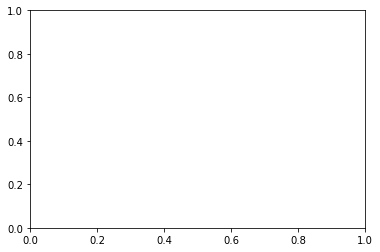

In [104]:
x = [b/bin_num for b in range(bin_num)]

plt.plot(x, iou_scores_false_list, "r", marker='D', markersize=3, label='false')
plt.plot(x, iou_scores_true_list, "b", marker='>', markersize=3, label='true')
plt.plot(x, iou_scores_fuzzy_list, "y", marker='>', markersize=3, label='fuzzy')


plt.xlabel("score")
plt.ylabel("acc")
plt.title("coco2017_score2acc")


plt.legend(loc="upper right")
# plt.savefig("1.jpg")
plt.show()

In [ ]:
i = 1
data_sample = val2017[i]['data_sample']
data_sample.gt_instances

In [ ]:
train2017[0]['data_sample']

In [105]:
val2017.get_cat_ids(0)

[39, 60, 0, 43, 45, 45, 69, 0, 41, 41, 45, 45, 50, 44, 50, 50, 69, 51, 71]

In [106]:
val2017.get_data_info(0)

{'img_path': 'data/coco/val2017/000000397133.jpg',
 'img_id': 397133,
 'seg_map_path': None,
 'height': 427,
 'width': 640,
 'instances': [{'ignore_flag': 0,
   'bbox': [217.62, 240.54, 256.61, 298.28999999999996],
   'bbox_label': 39,
   'mask': [[224.24,
     297.18,
     228.29,
     297.18,
     234.91,
     298.29,
     243.0,
     297.55,
     249.25,
     296.45,
     252.19,
     294.98,
     256.61,
     292.4,
     254.4,
     264.08,
     251.83,
     262.61,
     241.53,
     260.04,
     235.27,
     259.67,
     230.49,
     259.67,
     233.44,
     255.25,
     237.48,
     250.47,
     237.85,
     243.85,
     237.11,
     240.54,
     234.17,
     242.01,
     228.65,
     249.37,
     224.24,
     255.62,
     220.93,
     262.61,
     218.36,
     267.39,
     217.62,
     268.5,
     218.72,
     295.71,
     225.34,
     297.55]]},
  {'ignore_flag': 0,
   'bbox': [1.0, 240.24, 347.63, 427.0],
   'bbox_label': 60,
   'mask': [[292.37,
     425.1,
     340.6,
     